In [12]:
import json
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [13]:
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = "<OOV>"
training_size = 20000

In [4]:
# Download the dataset
!python -m wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json


Saved under sarcasm (1).json


In [14]:
with open("./sarcasm (1).json", 'r') as f:
    datastore = json.load(f)
    
sentences  = []
labels = []
for item in datastore:
    sentences.append(item['headline'])
    labels.append(item['is_sarcastic'])

In [15]:
training_sentences  = sentences[0: training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]


In [16]:
tokenizer = Tokenizer(num_words= vocab_size, oov_token= oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequences  = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen= max_length, 
                            padding= padding_type, truncating= trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen= max_length,
                               padding= padding_type , truncating=trunc_type)


training_labels = np.array(training_labels)
testing_labels = np.array(testing_labels)

In [17]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer= 'adam', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 32, 16)            160000    
                                                                 
 global_average_pooling1d_1  (None, 16)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_2 (Dense)             (None, 24)                408       
                                                                 
 dense_3 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160433 (626.69 KB)
Trainable params: 160433 (626.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
num_epochs = 30

history  = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
625/625 - 2s - loss: 0.5662 - accuracy: 0.6946 - val_loss: 0.3983 - val_accuracy: 0.8366 - 2s/epoch - 3ms/step
Epoch 2/30
625/625 - 1s - loss: 0.3142 - accuracy: 0.8739 - val_loss: 0.3491 - val_accuracy: 0.8533 - 1s/epoch - 2ms/step
Epoch 3/30
625/625 - 1s - loss: 0.2358 - accuracy: 0.9073 - val_loss: 0.3492 - val_accuracy: 0.8493 - 1s/epoch - 2ms/step
Epoch 4/30
625/625 - 1s - loss: 0.1891 - accuracy: 0.9277 - val_loss: 0.3680 - val_accuracy: 0.8495 - 1s/epoch - 2ms/step
Epoch 5/30
625/625 - 1s - loss: 0.1569 - accuracy: 0.9430 - val_loss: 0.3990 - val_accuracy: 0.8438 - 1s/epoch - 2ms/step
Epoch 6/30
625/625 - 2s - loss: 0.1328 - accuracy: 0.9532 - val_loss: 0.4234 - val_accuracy: 0.8472 - 2s/epoch - 3ms/step
Epoch 7/30
625/625 - 2s - loss: 0.1135 - accuracy: 0.9610 - val_loss: 0.4612 - val_accuracy: 0.8453 - 2s/epoch - 2ms/step
Epoch 8/30
625/625 - 2s - loss: 0.0997 - accuracy: 0.9660 - val_loss: 0.5085 - val_accuracy: 0.8392 - 2s/epoch - 3ms/step
Epoch 9/30
625/625 - 2s 

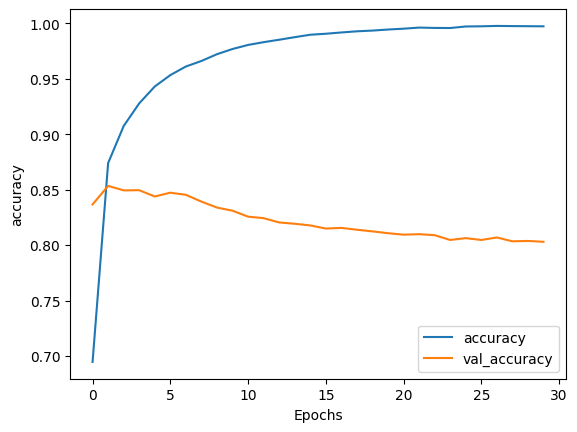

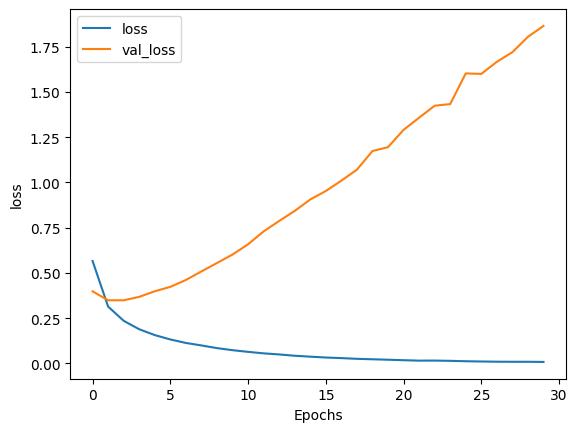

In [19]:
import matplotlib.pyplot as plt
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [20]:
reverse_word_index = tokenizer.index_word

embedding_layer = model.layers[0]

embedding_weights = embedding_layer.get_weights()[0]

print(embedding_weights.shape)

(10000, 16)


In [11]:
import io

# Open writeable files
out_v = io.open('vecs2.tsv', 'w', encoding='utf-8')
out_m = io.open('meta2.tsv', 'w', encoding='utf-8')

# Initialize the loop. Start counting at `1` because `0` is just for the padding
for word_num in range(1, vocab_size):

  # Get the word associated at the current index
  word_name = reverse_word_index[word_num]

  # Get the embedding weights associated with the current index
  word_embedding = embedding_weights[word_num]

  # Write the word name
  out_m.write(word_name + "\n")

  # Write the word embedding
  out_v.write('\t'.join([str(x) for x in word_embedding]) + "\n")

# Close the files
out_v.close()
out_m.close()